# **KNN Classifier**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv("/content/drive/MyDrive/datasets/ml/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [103]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [104]:
for i in df.columns:
  print(df.value_counts(i))

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99     17
100    17
106    14
111    14
129    14
       ..
186     1
190     1
191     1
198     1
199     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
75      8
92      8
65      7
94      6
85      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
46      2
30      2
104     2
55      2
40      1
24      1
38      1
61      1
95      1
102     1
114     1
122     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
28     20
33     20
18     20
31     19
19     18
39     18
2

In [105]:
col=df.columns
col=col[:-1]
print(col)
for i in col:
  df[i]=df[i].replace(0,np.nan)
  mean=int(df[i].mean(skipna=True))
  df[i]=df[i].fillna(mean)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [106]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [108]:
len(y_test)

192

In [109]:
import math
k=int(math.sqrt(len(y_test)))
if k%2==0:
  k+=1
k

13

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [111]:
knn.score(x_test,y_test)

0.7708333333333334

In [112]:
len(df.columns)

9

In [113]:
k_rng=range(1,16)
scores_euc=[]
for i in range(1,16):
  knn_euc=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
  knn_euc.fit(x_train,y_train)
  scores_euc.append(knn_euc.score(x_test,y_test))
  print(i,knn_euc.score(x_test,y_test))

1 0.6614583333333334
2 0.71875
3 0.7135416666666666
4 0.7447916666666666
5 0.7239583333333334
6 0.7395833333333334
7 0.7239583333333334
8 0.7708333333333334
9 0.7395833333333334
10 0.7604166666666666
11 0.765625
12 0.7604166666666666
13 0.7708333333333334
14 0.7708333333333334
15 0.7552083333333334


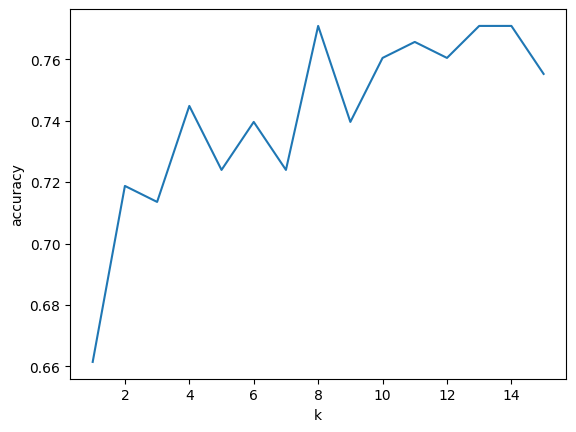

In [114]:
plt.plot(k_rng,scores_euc)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [115]:
scores_man=[]
for i in range(1,16):
  knn_man=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
  knn_man.fit(x_train,y_train)
  scores_man.append(knn_man.score(x_test,y_test))
  print(i,knn_man.score(x_test,y_test))

1 0.6875
2 0.734375
3 0.7447916666666666
4 0.7604166666666666
5 0.7552083333333334
6 0.78125
7 0.7864583333333334
8 0.7708333333333334
9 0.78125
10 0.765625
11 0.7604166666666666
12 0.7604166666666666
13 0.7552083333333334
14 0.7760416666666666
15 0.7760416666666666


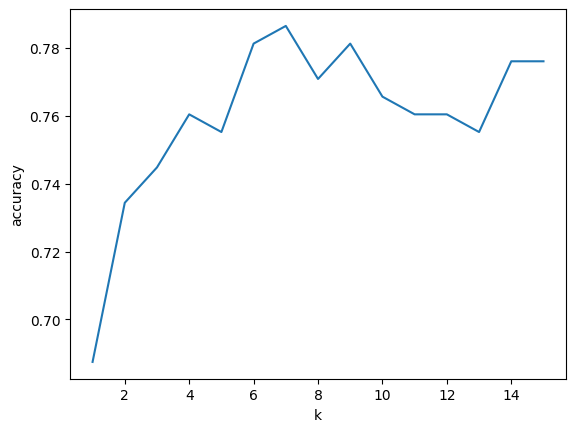

In [116]:
plt.plot(k_rng,scores_man)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [117]:
scores_min=[]
for i in range(1,16):
  knn_min=KNeighborsClassifier(n_neighbors=i,metric="minkowski")
  knn_min.fit(x_train,y_train)
  scores_min.append(knn_min.score(x_test,y_test))
  print(i,knn_min.score(x_test,y_test))

1 0.6614583333333334
2 0.71875
3 0.7135416666666666
4 0.7447916666666666
5 0.7239583333333334
6 0.7395833333333334
7 0.7239583333333334
8 0.7708333333333334
9 0.7395833333333334
10 0.7604166666666666
11 0.765625
12 0.7604166666666666
13 0.7708333333333334
14 0.7708333333333334
15 0.7552083333333334


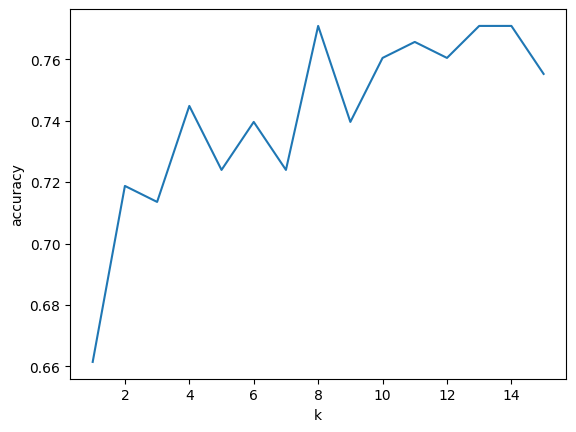

In [118]:
plt.plot(k_rng,scores_min)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [119]:
knn_man=KNeighborsClassifier(n_neighbors=9,metric="manhattan")
knn_man.fit(x_train,y_train)
knn_man.score(x_test,y_test)

0.78125

In [120]:
knn_euc=KNeighborsClassifier(n_neighbors=13,metric="euclidean")
knn_euc.fit(x_train,y_train)
knn_euc.score(x_test,y_test)

0.7708333333333334

In [121]:
knn_min=KNeighborsClassifier(n_neighbors=13,metric="minkowski")
knn_min.fit(x_train,y_train)
knn_min.score(x_test,y_test)

0.7708333333333334

In [122]:
knn_euc.predict([[1,189,60,23,846,30.1,0.398,59]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [123]:
knn_min.predict([[1,189,60,23,846,30.1,0.398,59]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [124]:
knn_man.predict([[1,189,60,23,846,30.1,0.398,59]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

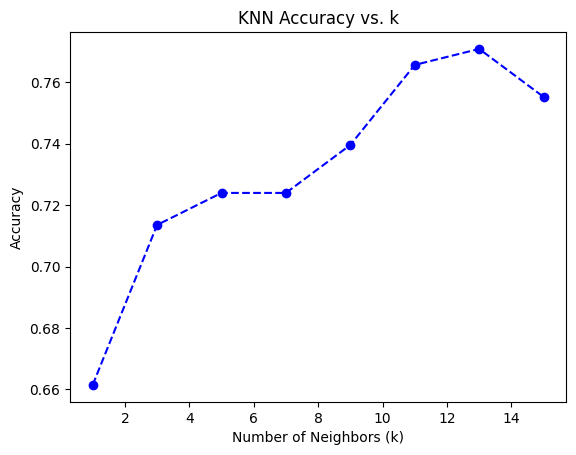

In [125]:
from sklearn.metrics import accuracy_score

# Try different k values and store accuracy
k_values = range(1, 16, 2)  # Odd values from 1 to 15
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.show()


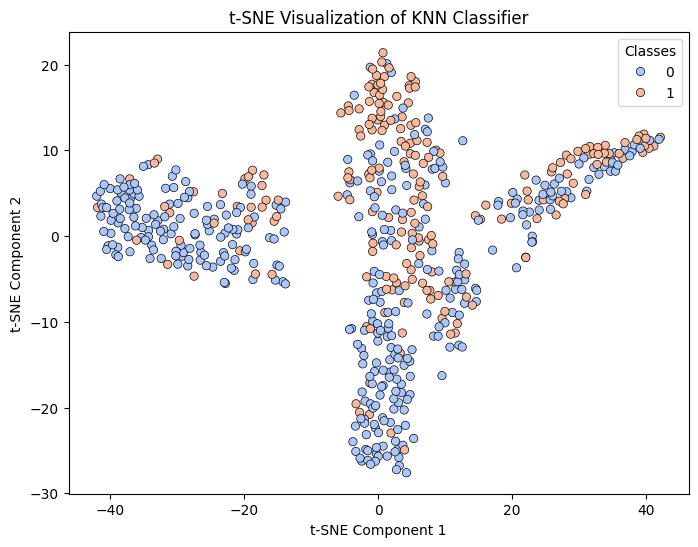

In [126]:
from sklearn.manifold import TSNE

# Reduce features to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

# Plot the t-SNE visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of KNN Classifier")
plt.legend(title="Classes")
plt.show()


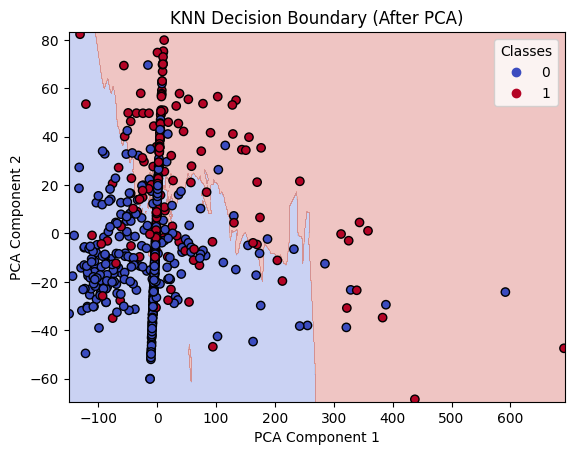

In [127]:
from sklearn.decomposition import PCA

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train KNN on PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(x_train_pca, y_train)

# Create a mesh grid for decision boundary
h = 0.2  # Step size
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundary (After PCA)")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
